In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_bigtech = pd.read_csv('bigtech_lobby_issue_2011-2021.csv')

In [3]:
df_bigtech.columns

Index(['season', 'year', 'amazon_lobby', 'facebook_lobby', 'google_lobby',
       'apple_lobby', 'microsoft_lobby', 'amazon_link', 'facebook_link',
       'google_link', 'apple_link', 'microsoft_link', 'amazon_text',
       'facebook_text', 'google_text', 'apple_text', 'microsoft_text',
       'amazon_issue_code', 'amazon_specific_issue', 'facebook_issue_code',
       'facebook_specific_issue', 'google_issue_code', 'google_specific_issue',
       'apple_issue_code', 'apple_specific_issue', 'microsoft_issue_code',
       'microsoft_specific_issue'],
      dtype='object')

In [4]:
df = df_bigtech[['season', 'year', 'amazon_specific_issue', 
       'facebook_specific_issue','google_specific_issue',
        'apple_specific_issue', 'microsoft_specific_issue']]

In [5]:
df.head(2)

,season,year,amazon_specific_issue,facebook_specific_issue,google_specific_issue,apple_specific_issue,microsoft_specific_issue
0,2021 2nd Quarter - Report,2021,"[' Issues related to broadband, satellite com...","[' S. 936, Integrity, Notification, and Fairn...",[' Regulation of online advertising Privacy a...,[' General patent policy Issues related to st...,"["" Licensing, competition, trade, and governm..."
1,2021 1st Quarter - Report,2021,"[' Issues related to broadband, satellite com...","[' S. 936, Integrity, Notification, and Fairn...",[' Regulation of online advertising Privacy a...,[' General patent policy Issues related to st...,"["" Licensing, competition, trade, and governm..."


### Let's Try.   https://investigate.ai/text-analysis/a-simple-explanation-of-tf-idf/

In [5]:
import re
from collections import Counter
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import Stemmer

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
%matplotlib inline

In [7]:
# text = df.amazon_specific_issue[0]

In [8]:
"""
remove numbers = .replace('\d+', 'NUM', regex=True)
remove numbers with 3 digits = .replace('\d{3}', '', regex=True)
"""

"\nremove numbers = .replace('\\d+', 'NUM', regex=True)\nremove numbers with 3 digits = .replace('\\d{3}', '', regex=True)\n"

In [9]:
# #test without Stemmer
# texts = df.amazon_specific_issue.replace('\d{3}', '', regex=True)

# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=200)
# vectors = vectorizer.fit_transform(texts)
# words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
# words_df.index = df.season
# # words_df.head()

In [14]:
#With Stemmer
texts = df.amazon_specific_issue.replace('\d{3}', '', regex=True)
stemmer = Stemmer.Stemmer('en')
analyzer = CountVectorizer().build_analyzer()

# Override CountVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

# Create a new StemmedTfidfVectorizer
vectorizer = CountVectorizer(stop_words=['english','act','and','to','the','of','for','as','on','fy','fiscal','year'], ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vectors = vectorizer.fit_transform(texts)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.index = df.season

In [1]:
# words_df

In [16]:
words_df.shape

(42, 100)

In [17]:
vectorizer.get_feature_names()

['19',
 'accessibility online',
 'agencies',
 'agencies appropriations',
 'appropriations',
 'appropriations public',
 'authentication',
 'bill',
 'bills',
 'business',
 'care',
 'cares',
 'cares public',
 'computing including',
 'consolidated',
 'consolidated appropriations',
 'consumer',
 'copyright office',
 'covid',
 'covid 19',
 'critical',
 'critical infrastructure',
 'customs',
 'cybersecurity',
 'cybersecurity cloud',
 'development',
 'dues',
 'education',
 'employee',
 'faa',
 'fairness',
 'financial',
 'food',
 'government',
 'government procurement',
 'health',
 'health care',
 'housing',
 'housing urban',
 'implementation',
 'including implementation',
 'information',
 'infrastructure',
 'infrastructure protection',
 'infringement copyright',
 'intelligence',
 'international terminal',
 'internet things',
 'iot',
 'it modernization',
 'law',
 'law issues',
 'licensing',
 'mobile',
 'music',
 'music licensing',
 'net',
 'net neutrality',
 'neutrality rate',
 'office',
 'offi

In [57]:
amazon100list = vectorizer.get_feature_names()

In [59]:
amazon100 = pd.Series(amazon100list)

In [14]:
words_df.to_csv('amazon_num_words.csv', index=True)

<AxesSubplot:xlabel='season'>

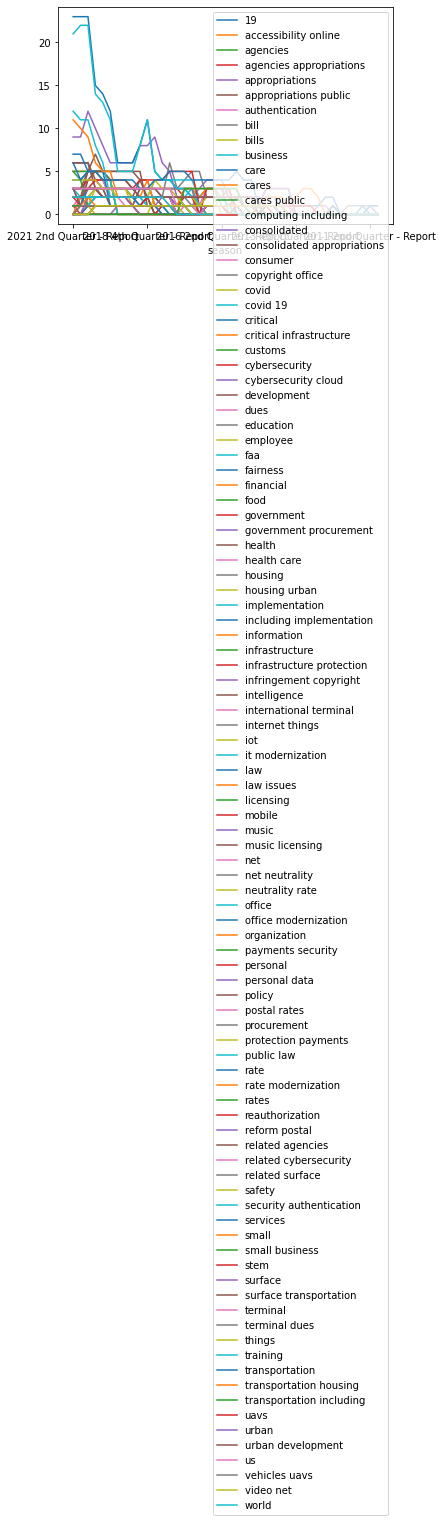

In [15]:
words_df.plot()

In [16]:
normalize_df = words_df.div(words_df.sum(axis=1), axis=0).fillna(0)*100

In [17]:
normalize_df.head()

,19,accessibility online,agencies,agencies appropriations,appropriations,appropriations public,authentication,bill,bills,business,care,cares,cares public,computing including,consolidated,consolidated appropriations,consumer,copyright office,covid,covid 19,critical,critical infrastructure,customs,cybersecurity,cybersecurity cloud,development,dues,education,employee,faa,fairness,financial,food,government,government procurement,health,health care,housing,housing urban,implementation,including implementation,information,infrastructure,infrastructure protection,infringement copyright,intelligence,international terminal,internet things,iot,it modernization,law,law issues,licensing,mobile,music,music licensing,net,net neutrality,neutrality rate,office,office modernization,organization,payments security,personal,personal data,policy,postal rates,procurement,protection payments,public law,rate,rate modernization,rates,reauthorization,reform postal,related agencies,related cybersecurity,related surface,safety,security authentication,services,small,small business,stem,surface,surface transportation,terminal,terminal dues,things,training,transportation,transportation housing,transportation including,uavs,urban,urban development,us,vehicles uavs,video net,world
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021 2nd Quarter - Report,1.619433,0.000000,0.809717,0.809717,3.643725,2.429150,0.809717,0.000000,0.404858,0.0,0.809717,2.024291,2.024291,0.404858,2.429150,2.429150,0.404858,0.404858,1.619433,1.619433,0.404858,0.404858,0.809717,1.214575,0.404858,0.809717,0.404858,0.809717,0.809717,0.404858,0.000000,0.809717,0.809717,1.214575,1.214575,1.214575,0.809717,0.809717,0.809717,4.858300,2.834008,0.000000,2.024291,0.404858,0.0,0.404858,0.404858,0.809717,0.404858,1.214575,9.311741,4.453441,0.809717,0.0,0.404858,0.404858,0.00000,0.00000,0.00000,0.404858,0.404858,0.809717,0.404858,0.000000,0.000000,0.809717,0.404858,1.214575,0.404858,8.502024,0.00000,0.00000,0.404858,0.809717,0.404858,0.809717,0.809717,0.404858,1.619433,0.404858,0.404858,0.404858,0.0,0.404858,1.214575,1.214575,0.404858,0.404858,0.809717,0.809717,2.429150,0.809717,0.404858,0.000000,0.809717,0.809717,1.214575,0.000000,0.00000,0.809717
2021 1st Quarter - Report,1.639344,0.409836,0.819672,0.819672,3.688525,2.459016,0.819672,0.819672,0.409836,0.0,0.819672,2.049180,2.049180,0.000000,2.459016,2.459016,0.819672,0.409836,1.639344,1.639344,0.409836,0.409836,0.819672,1.229508,0.409836,0.819672,0.409836,0.819672,0.819672,0.409836,0.000000,0.819672,0.819672,1.229508,1.229508,1.229508,0.819672,0.819672,0.819672,4.508197,2.868852,0.819672,1.639344,0.409836,0.0,0.409836,0.409836,0.819672,0.409836,0.819672,9.426230,4.098361,0.819672,0.0,0.409836,0.409836,0.00000,0.00000,0.00000,0.409836,0.409836,0.819672,0.409836,0.000000,0.000000,0.819672,0.409836,1.229508,0.409836,9.016393,0.00000,0.00000,0.409836,0.409836,0.409836,0.819672,0.819672,0.409836,1.639344,0.409836,0.409836,0.409836,0.0,0.409836,0.409836,0.409836,0.409836,0.409836,0.819672,0.819672,1.639344,0.819672,0.409836,0.409836,0.819672,0.819672,1.229508,0.409836,0.00000,0.819672
2020 4th Quarter - Report,1.811594,0.362319,1.086957,1.086957,4.347826,2.173913,0.724638,0.362319,0.362319,0.0,1.086957,1.811594,1.811594,0.362319,2.173913,2.173913,1.449275,0.362319,1.811594,1.811594,0.362319,0.362319,0.724638,1.086957,0.362319,1.811594,0.362319,1.086957,0.724638,0.362319,0.362319,1.086957,1.086957,1.449275,1.086957,1.811594,0.724638,1.086957,1.086957,3.985507,1.811594,0.724638,0.362319,0.362319,0.0,1.449275,0.362319,0.724638,0.362319,0.724638,8.333333,3.260870,0.724638,0.0,0.362319,0.362319,0.00000,0.00000,0.00000,0.362319,0.362319,0.724638,0.362319,0.724638,0.724638,0.724638,0.362319,1.086957,0.362319,7.971014,0.00000,0.00000,0.362319,0.362319,0.362319,1.086957,0.724638,0.362319,1.449275,0.362319,1.086957,0.724638,0.0,0.362319,0.362319,0.362319,0.362319,0.362319,0.724638,0.724638,1.811594,1.08

In [18]:
normalize_df.to_csv('amazon_freq_word.csv', index=True)

<AxesSubplot:xlabel='season'>

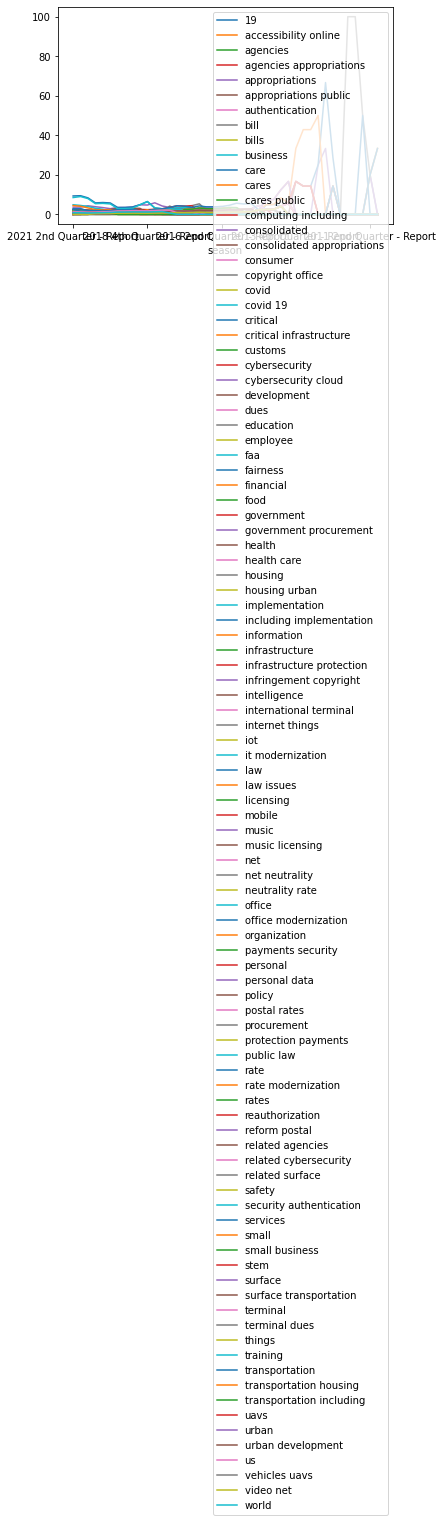

In [19]:
normalize_df.plot()

### words used frequent past 10 years

In [20]:
# texts = df.amazon_specific_issue.replace('\d+', ' ', regex=True)

# for text in texts:
#     text = text.lower()
#     text = re.sub("[^\w ]", "", text)

#     words = text.split(" ")
#     print(Counter(words).most_common(20))
#     print('---')

In [47]:
#With Stemmer
texts = df.facebook_specific_issue.replace('\d{3}', '', regex=True)
stemmer = Stemmer.Stemmer('en')
analyzer = CountVectorizer().build_analyzer()

# Override CountVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

# Create a new StemmedTfidfVectorizer
vectorizer = CountVectorizer(stop_words=['english','act','and','to','the','of','for','as','on','fy','fiscal','year'], ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vectors = vectorizer.fit_transform(texts)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.index = df.season

In [2]:
# words_df

<AxesSubplot:xlabel='season'>

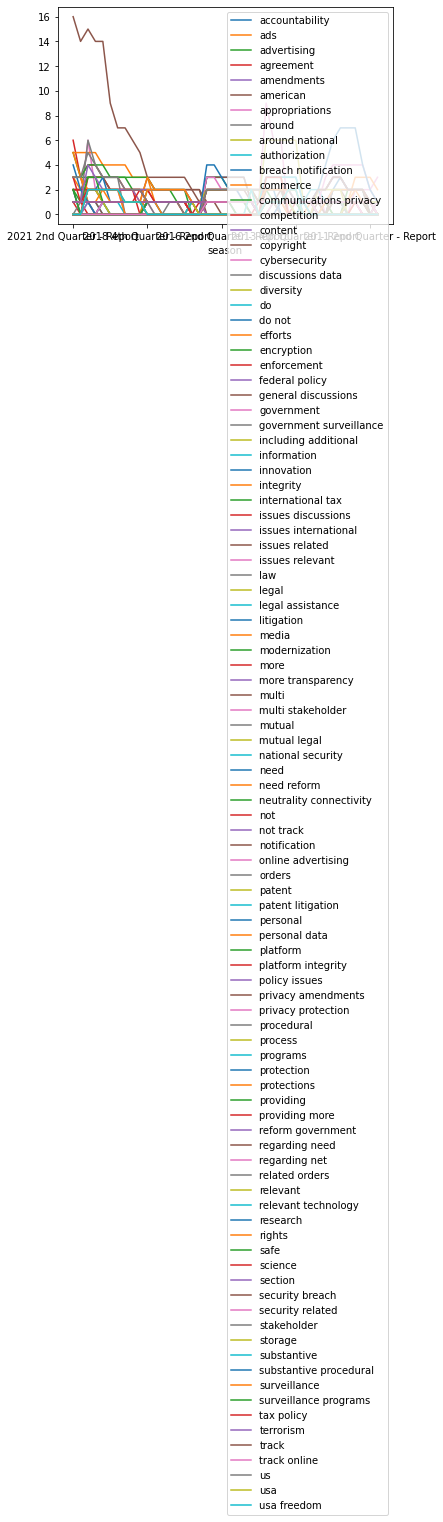

In [48]:
words_df.plot()

In [50]:
words_df.to_csv('facebook_num_words.csv', index=True)

In [51]:
fb100list = vectorizer.get_feature_names()

In [53]:
fb100 = pd.Series(fb100list)

In [60]:
#With Stemmer
texts = df.google_specific_issue.replace('\d{3}', '', regex=True)
stemmer = Stemmer.Stemmer('en')
analyzer = CountVectorizer().build_analyzer()

# Override CountVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

# Create a new StemmedTfidfVectorizer
vectorizer = CountVectorizer(stop_words=['english','act','and','to','the','of','for','as','on','fy','fiscal','year'], ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vectors = vectorizer.fit_transform(texts)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.index = df.season

In [3]:
# words_df.head()

<AxesSubplot:xlabel='season'>

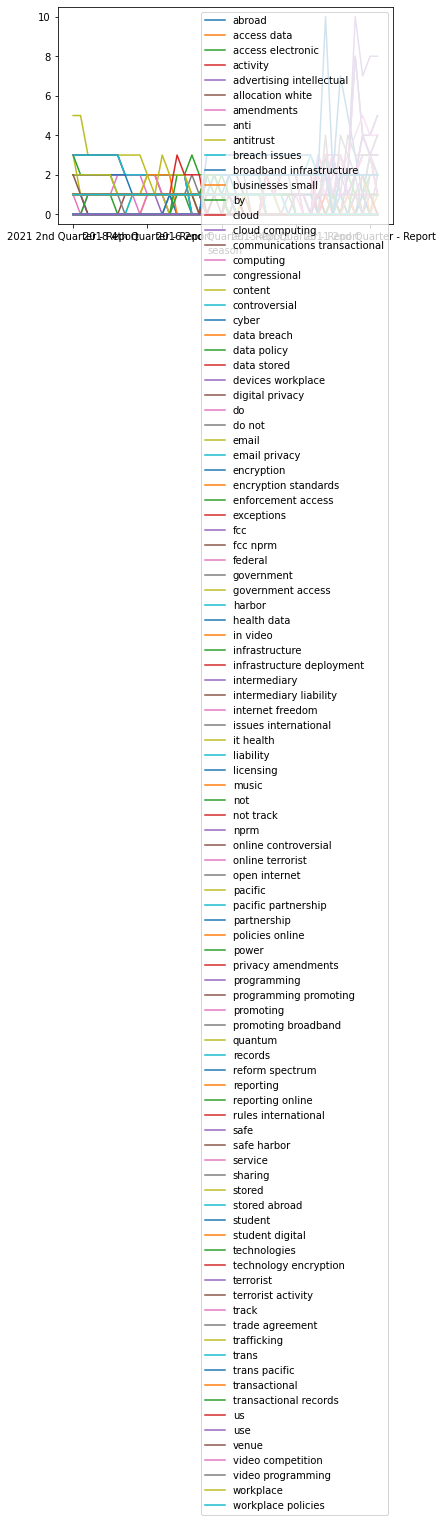

In [62]:
words_df.plot()

In [63]:
words_df.to_csv('google_num_words.csv', index=True)

In [66]:
google100list = vectorizer.get_feature_names()
google100 = pd.Series(google100list)

In [67]:
#With Stemmer
texts = df.apple_specific_issue.replace('\d{3}', '', regex=True)
stemmer = Stemmer.Stemmer('en')
analyzer = CountVectorizer().build_analyzer()

# Override CountVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

# Create a new StemmedTfidfVectorizer
vectorizer = CountVectorizer(stop_words=['english','act','and','to','the','of','for','as','on','fy','fiscal','year'], ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vectors = vectorizer.fit_transform(texts)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.index = df.season

In [4]:
# words_df.head()

<AxesSubplot:xlabel='season'>

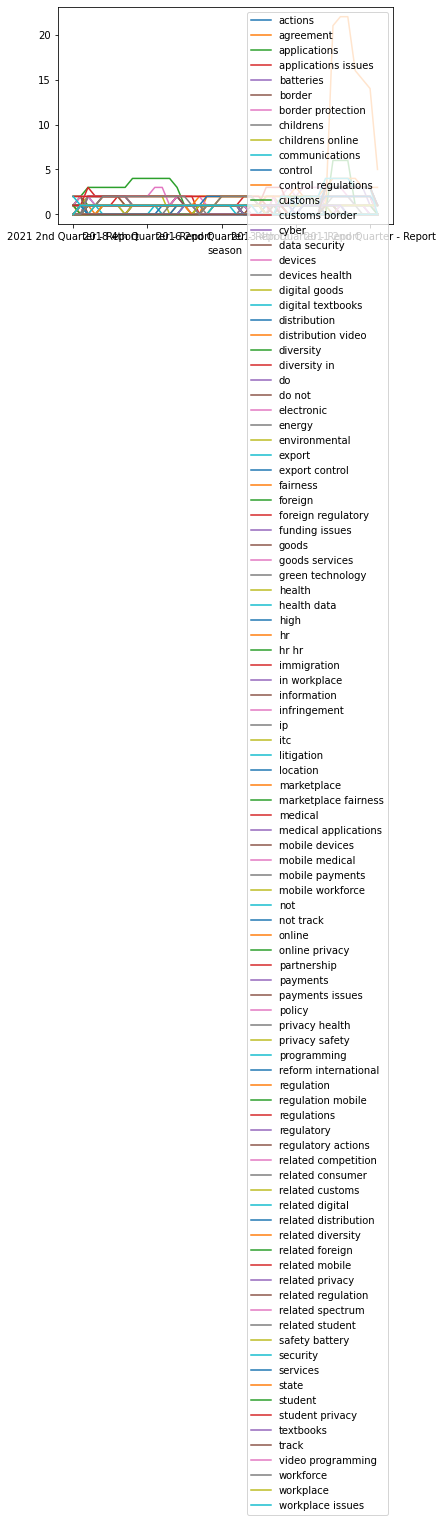

In [69]:
words_df.plot()

In [70]:
words_df.to_csv('apple_num_words.csv', index=True)

In [73]:
apple100list = vectorizer.get_feature_names()
apple100 = pd.Series(apple100list)

In [74]:
#With Stemmer
texts = df.microsoft_specific_issue.replace('\d{3}', '', regex=True)
stemmer = Stemmer.Stemmer('en')
analyzer = CountVectorizer().build_analyzer()

# Override CountVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

# Create a new StemmedTfidfVectorizer
vectorizer = CountVectorizer(stop_words=['english','act','and','to','the','of','for','as','on','fy','fiscal','year'], ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vectors = vectorizer.fit_transform(texts)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.index = df.season

In [5]:
# words_df.head()

<AxesSubplot:xlabel='season'>

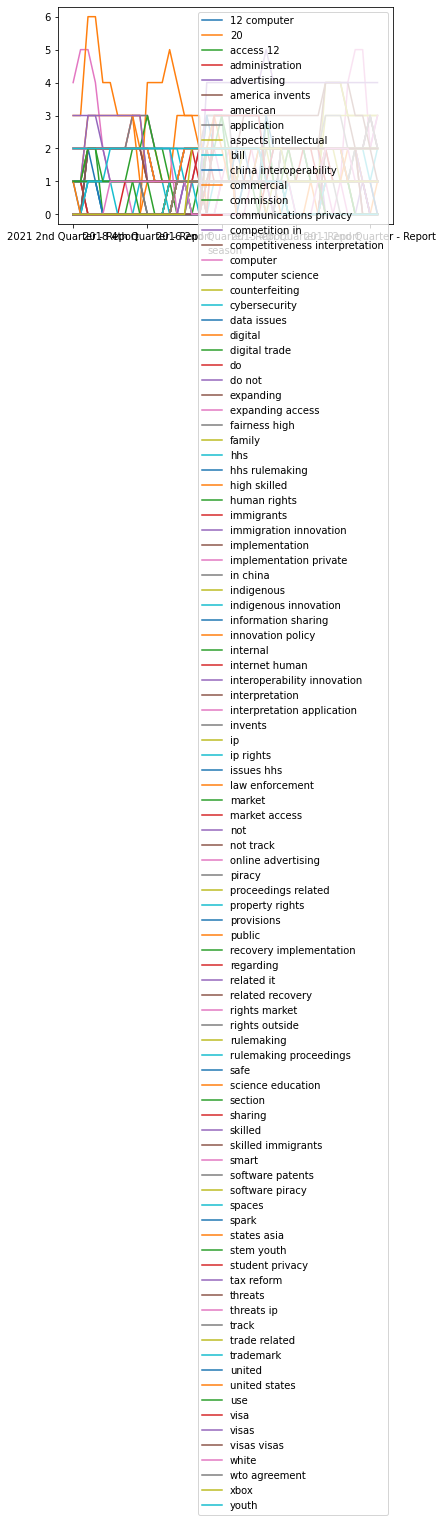

In [76]:
words_df.plot()

In [77]:
words_df.to_csv('microsoft_num_words.csv', index=True)

In [81]:
microsoft100list = vectorizer.get_feature_names()
microsoft100 = pd.Series(microsoft100list)

In [85]:
bigtech100 = pd.concat([amazon100, fb100, google100, apple100, microsoft100], axis = 1)

In [88]:
bigtech100 = bigtech100.rename(columns={0: 'amazon', 1:'facebook', 2: 'google', 3: 'apple', 4: 'microsoft'})

In [89]:
bigtech100.to_csv('bigtech100.csv', index=False)